In [ ]:
import pandas as pd
import os

def read_and_shape_csv(directory_path):
    all_dfs = []  # Create an empty list to store DataFrames for each file

    # Iterate over each file in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(directory_path, filename)
            try:
                # Read CSV file into a DataFrame
                df = pd.read_csv(file_path)

                # Append the DataFrame to the list
                all_dfs.append(df)

            except FileNotFoundError:
                print(f"File '{filename}' not found.")

    return all_dfs

# Replace 'directory_path' with the path to the directory containing your CSV files
directory_path = '/home/sanjeev/Dhanunjay/Keppler Mapping LBP/SCZ data'  # Example directory path
all_dfs = read_and_shape_csv(directory_path)


In [ ]:


# Print the size of all_dfs
print("Number of DataFrames in all_dfs:", len(all_dfs))

Number of DataFrames in all_dfs: 40


In [ ]:
import numpy as np
print(len(all_dfs))
# for df in all_dfs:
#     print(df.shape)

40


In [ ]:
import numpy as np

# Initialize an empty list to store the sliced and transposed DataFrames
all_sliced_data = []
data_untransposed=[]
# Loop through each DataFrame in all_dfs
for df in all_dfs:
    # Perform slicing operation
    sliced_data = df.iloc[0:1000, 4:68]
    data_untransposed.append(sliced_data)
#     Perform transposition
    transposed_data = np.transpose(sliced_data)

#     Append the transposed DataFrame to the list
    all_sliced_data.append(transposed_data)
#     all_sliced_data.append(sliced_data)

# Now all_sliced_data will contain transposed DataFrames for all DataFrames in all_dfs
# You can access each transposed DataFrame using indexing, for example: all_sliced_data[0], all_sliced_data[1], etc.


In [ ]:
print(len(all_sliced_data))
print(np.shape(data_untransposed[0]))
# for df in all_sliced_data:
#     print(df.shape)

40
(1000, 64)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import umap.umap_ as umap
from gtda.mapper import (
    CubicalCover,
    make_mapper_pipeline,
    Projection,
)
import networkx as nx

# Step 1: Dimensionality reduction using UMAP
mapper_dim = 2  # Dimensionality of the Mapper output
mapper_overlap = 0.5  # Overlap between adjacent bins in the Mapper cover

all_adjacency= []


for idx, sliced_data in enumerate(all_sliced_data):
    # Dimensionality reduction using UMAP
    umap_reducer = umap.UMAP(n_components=mapper_dim)
    umap_embedding = umap_reducer.fit_transform(sliced_data.values)

    # Apply clustering algorithm
    clusterer = DBSCAN(eps=0.5, min_samples=5)
    cluster_labels = clusterer.fit_predict(umap_embedding)

    # Apply Mapper algorithm
    cover = CubicalCover(n_intervals=10)

    # Apply Mapper algorithm manually
    mapper_data = np.column_stack((umap_embedding, cluster_labels))
    mapper_graph = nx.Graph()

    for i, data_point in enumerate(mapper_data):
        node_id = i
        mapper_graph.add_node(node_id, pos=data_point[:2])
        for j, other_data_point in enumerate(mapper_data):
            other_node_id = j
            if i != j and np.linalg.norm(data_point - other_data_point) < 0.5:
                mapper_graph.add_edge(node_id, other_node_id)

    # Visualize Mapper graph using networkx
    plt.figure(figsize=(10, 8))
    pos = nx.get_node_attributes(mapper_graph, 'pos')
#     nx.draw(mapper_graph, pos=pos, node_size=50, node_color='blue', with_labels=False)
#     nx.draw_networkx_edges(mapper_graph, pos=pos, edge_color='black')
#     plt.title(f'Mapper Graph for Subject {idx+1}')
#     plt.xlabel('UMAP Dimension 1')
#     plt.ylabel('UMAP Dimension 2')
#     plt.savefig(f'subject_{idx+1}.jpg', format='jpg', dpi=600)
#     plt.savefig(f'subject_{idx+1}.svg', format='svg', dpi=600)
#     plt.savefig(f'subject_{idx+1}.eps', format='eps', dpi=600)
#     plt.show()
    # Step 2: Extracting adjacency matrix from the Mapper graph
    adjacency_matrix = nx.adjacency_matrix(mapper_graph).toarray()
    all_adjacency.append(adjacency_matrix)


    # Step 3: Extracting covariance matrix from the data points within each cluster
#     def extract_covariance_matrix_from_clusters(data, cluster_labels):
#         unique_labels = np.unique(cluster_labels)
#         covariance_matrices = []
#         for label in unique_labels:
#             cluster_indices = np.where(cluster_labels == label)[0]
#             cluster_data = data.iloc[cluster_indices]
#             covariance_matrix = np.cov(cluster_data.values, rowvar=False)
#             covariance_matrices.append(covariance_matrix)
#         covariance_matrix = np.mean(covariance_matrices, axis=0)
#         return covariance_matrix

#     covariance_matrix = extract_covariance_matrix_from_clusters(sliced_data, cluster_labels)
#     all_covariance.append(covariance_matrix)

#     # Step 4: Extracting correlation matrix from the data points within each cluster
#     def extract_correlation_matrix_from_clusters(data, cluster_labels):
#         unique_labels = np.unique(cluster_labels)
#         correlation_matrices = []
#         for label in unique_labels:
#             cluster_indices = np.where(cluster_labels == label)[0]
#             cluster_data = data.iloc[cluster_indices]
#             correlation_matrix = cluster_data.corr().values
#             correlation_matrices.append(correlation_matrix)
#         correlation_matrix = np.mean(correlation_matrices, axis=0)
#         return correlation_matrix

#     correlation_matrix = extract_correlation_matrix_from_clusters(sliced_data, cluster_labels)
#     all_correlation.append(correlation_matrix)
    # Example usage:
    # Assuming 'sliced_data' is your DataFrame containing the dataset
    # 'cluster_labels' are the labels assigned by DBSCAN clustering

#     # Extract adjacency matrix
# print("Adjacency Matrix:")
# print(all_adjacency)
# print(adjacency_matrix.shape)

#         # Extract covariance matrix
# print("\nCovariance Matrix:")
# print(all_covariance)

# for i in range(40):
#     final_data.append(all_adjacency[i])
#     final_data.append(all_covariance[i])
#     final_data.append(all_correlation[i])
# print(shape(final_data))

/tmp/ipykernel_51652/1554281358.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 8))


<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [ ]:
np.shape(all_adjacency)

(40, 64, 64)

In [ ]:
all_covariance= []
all_correlation= []
for idx, sliced_data in enumerate(data_untransposed):
    def extract_covariance_matrix_from_clusters(data, cluster_labels):
        unique_labels = np.unique(cluster_labels)
        covariance_matrices = []
        for label in unique_labels:
            cluster_indices = np.where(cluster_labels == label)[0]
            cluster_data = data.iloc[cluster_indices]
            covariance_matrix = np.cov(cluster_data.values, rowvar=False)
            covariance_matrices.append(covariance_matrix)
        covariance_matrix = np.mean(covariance_matrices, axis=0)
        return covariance_matrix

    covariance_matrix = extract_covariance_matrix_from_clusters(sliced_data, cluster_labels)
    all_covariance.append(covariance_matrix)

    # Step 4: Extracting correlation matrix from the data points within each cluster
    def extract_correlation_matrix_from_clusters(data, cluster_labels):
        unique_labels = np.unique(cluster_labels)
        correlation_matrices = []
        for label in unique_labels:
            cluster_indices = np.where(cluster_labels == label)[0]
            cluster_data = data.iloc[cluster_indices]
            correlation_matrix = cluster_data.corr().values
            correlation_matrices.append(correlation_matrix)
        correlation_matrix = np.mean(correlation_matrices, axis=0)
        return correlation_matrix

    correlation_matrix = extract_correlation_matrix_from_clusters(sliced_data, cluster_labels)
    all_correlation.append(correlation_matrix)

In [ ]:
np.shape(all_covariance)

(40, 64, 64)

In [ ]:
np.shape(all_correlation)

(40, 64, 64)

In [ ]:

new_label=[]
for i in range(25):
    new_label.append(0)
for i in range(15):
    new_label.append(1)
new_label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
final_all= []
for i in range(40):
    final_data= []
    final_data.append(all_adjacency[i])
    final_data.append(all_covariance[i])
    final_data.append(all_correlation[i])
    final_all.append(final_data)
print(final_all)

[[array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), array([[  7.33196945,   5.87925826,   8.86479168, ..., -14.20618925,
        -16.33472052, -15.75456097],
       [  5.87925826,   5.76271586,   7.58722831, ..., -15.20550579,
        -17.33757579, -16.63090442],
       [  8.86479168,   7.58722831,  12.24526802, ..., -19.49963937,
        -22.83370632, -21.64438449],
       ...,
       [-14.20618925, -15.20550579, -19.49963937, ...,  82.42942828,
         84.21009955,  87.05693238],
       [-16.33472052, -17.33757579, -22.83370632, ...,  84.21009955,
         91.05269371,  91.5961222 ],
       [-15.75456097, -16.63090442, -21.64438449, ...,  87.05693238,
         91.5961222 ,  94.8671509 ]]), array([[ 1.        ,  0.89273168,  0.93333668, ..., -0.55851521,
        -0.54991338, -0.53796238],
       [ 0.89273168,  1.        ,  0.91267

In [ ]:
print(np.shape(final_all[0][2]))

(64, 64)


In [ ]:
final_data=[]
final_reg_data=[]
all_adjacency = np.array(all_adjacency)
all_covariance = np.array(all_covariance)
all_correlation = np.array(all_correlation)


all_adjacency= all_adjacency.reshape(len(all_adjacency), -1)
all_covariance= all_covariance.reshape(len(all_covariance), -1)
all_correlation= all_correlation.reshape(len(all_correlation), -1)

final_data= np.concatenate((all_adjacency, all_covariance, all_correlation), axis=1)
final_reg_data=final_reg_data.append(final_data)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_data, new_label, test_size=0.2, random_state=0)


# Convert lists to NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Now you can print the shapes
print("Dimension for X train:", X_train.shape)
print("Dimension for X test:", X_test.shape)
print("Dimension for y train:", y_train.shape)
print("Dimension for y test:", y_test.shape)

Dimension for X train: (32, 12288)
Dimension for X test: (8, 12288)
Dimension for y train: (32,)
Dimension for y test: (8,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.metrics import roc_curve , auc
import matplotlib.pyplot as plt

In [ ]:
from sklearn import svm
cl = svm.SVC(kernel='linear', C=0.01)
cl = svm.SVC(probability= True)
cl.fit(X_train, y_train)
pred_prob_svm_positive = cl.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_svm_positive)
roc_auc= auc(fpr, tpr)

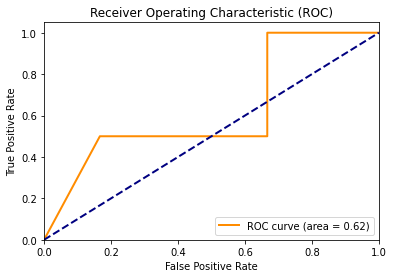

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_pred = cl.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred_1)
cm

array([[3, 3],
       [2, 0]])

In [ ]:
svm_accuracy= accuracy_score(y_test, y_pred)
svm_kappa = cohen_kappa_score(y_test, y_pred)
svm_auc = roc_auc_score(y_test, y_pred) # Note: AUC is typically used for binary classification, may need modification for multi-class
svm_precision = precision_score(y_test, y_pred, average='weighted') # or 'macro', 'micro', 'samples', 'weighted'
svm_recall = recall_score(y_test, y_pred, average='weighted') # or 'macro', 'micro', 'samples', 'weighted'
svm_f1 = f1_score(y_test, y_pred, average='weighted') # or 'macro', 'micro', 'samples', 'weighted'
print("Accuracy:", svm_accuracy)
print("Kappa:", svm_kappa)
print("AUC:", svm_auc)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)

Accuracy: 0.75
Kappa: 0.5
AUC: 0.8333333333333334
Precision: 0.875
Recall: 0.75
F1 Score: 0.7666666666666667


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000],
              'degree': [2, 3, 4, 5],
              'gamma':[0.001, 0.01, 0.1, 0.5, 1],
              'kernel': ['rbf','poly']
              }
cl = svm.SVC()
grid = GridSearchCV(cl, parameters, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'C': 0.001, 'degree': 4, 'gamma': 0.01, 'kernel': 'poly'}
SVC(C=0.001, degree=4, gamma=0.01, kernel='poly')
0.6583333333333333


In [ ]:
from sklearn.metrics import classification_report
grid_prediction = grid.predict(X_test)
print(classification_report(y_test, grid_prediction))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       0.00      0.00      0.00         2

    accuracy                           0.75         8
   macro avg       0.38      0.50      0.43         8
weighted avg       0.56      0.75      0.64         8



/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, roc_auc_score, precision_score, recall_score, f1_score

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={
'n_estimators': [200, 500],
'max_features': ["auto", "sqrt", "log2"],
'max_depth': [5,6,7,8,9],
'criterion': ["gini", "entropy"]
}
RFC= RandomForestClassifier()
grid = GridSearchCV(estimator=RFC,param_grid=parameters,cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'n_estimators': 200}
RandomForestClassifier(max_depth=9, n_estimators=200)
0.4523809523809524


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_data, new_label, test_size=0.2, random_state=0)

RandomForestClassifier(max_depth=6, max_features='sqrt', n_estimators=200)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate metrics
rf_accuracy = accuracy_score(y_test, y_pred)
rf_kappa = cohen_kappa_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred) # Note: AUC is typically used for binary classification, may need modification for multi-class
rf_precision = precision_score(y_test, y_pred, average='weighted') # or 'macro', 'micro', 'samples', 'weighted'
rf_recall = recall_score(y_test, y_pred, average='weighted') # or 'macro', 'micro', 'samples', 'weighted'
rf_f1 = f1_score(y_test, y_pred, average='weighted') # or 'macro', 'micro', 'samples', 'weighted'

# Print the metrics
print("Accuracy:", rf_accuracy)
print("Kappa:", rf_kappa)
print("AUC:", rf_auc)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

Accuracy: 0.75
Kappa: 0.33333333333333337
AUC: 0.6666666666666666
Precision: 0.75
Recall: 0.75
F1 Score: 0.75


In [ ]:
pred_prob_rf_positive = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_rf_positive)
roc_auc_rf= auc(fpr, tpr)

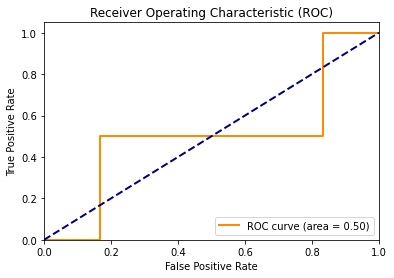

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={
'max_features': ["auto", "sqrt", "log2"],
'ccp_alpha': [0.0001,0.001,0.1],
'max_depth': [5,6,7,8,9],
'criterion': ["gini", "entropy"]
}
dct= DecisionTreeClassifier()
grid = GridSearchCV(estimator=dct,param_grid=parameters,verbose=True,cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 10 folds for each of 90 candidates, totalling 900 fits
{'ccp_alpha': 0.0001, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'log2'}
DecisionTreeClassifier(ccp_alpha=0.0001, max_depth=9, max_features='log2')
0.7166666666666667


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=7,max_features='auto')

# Fit the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Calculate metrics
dtc_accuracy = accuracy_score(y_test, y_pred)
dtc_kappa = cohen_kappa_score(y_test, y_pred)
dtc_auc = roc_auc_score(y_test, y_pred) # Note: AUC is typically used for binary classification, may need modification for multi-class
dtc_precision = precision_score(y_test, y_pred, average='weighted') # or 'macro', 'micro', 'samples', 'weighted'
dtc_recall = recall_score(y_test, y_pred, average='weighted') # or 'macro', 'micro', 'samples', 'weighted'
dtc_f1 = f1_score(y_test, y_pred, average='weighted') # or 'macro', 'micro', 'samples', 'weighted'

# Print the metrics
print("Accuracy:", dtc_accuracy)
print("Cohen's Kappa:", dtc_kappa)
print("AUC:", dtc_auc)
print("Precision:", dtc_precision)
print("Recall:", dtc_recall)
print("F1 Score:", dtc_f1)

Accuracy: 0.625
Cohen's Kappa: 0.1428571428571429
AUC: 0.5833333333333334
Precision: 0.6833333333333335
Recall: 0.625
F1 Score: 0.6454545454545454


In [ ]:
pred_prob_dt_positive = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_dt_positive)
roc_auc_dt= auc(fpr, tpr)

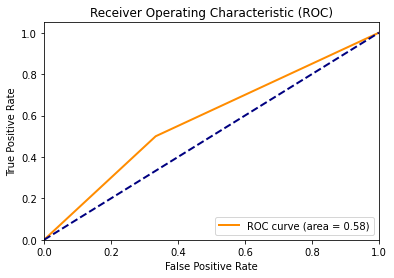

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(),LogisticRegression(max_iter=1000,solver='saga',tol=0.1))
param_grid={'logisticregression__C':[0.1,1,10,100],'logisticregression__penalty':['l1','l2']}
grid_search=GridSearchCV(pipe,param_grid,cv=5)
grid_search.fit(X_train, y_train)
# grid = {"C":np.logspace(-3,3,7),"penalty":["l1","l2"]}
# logreg=LogisticRegression()
# logreg_cv= GridSearchCV(logreg,grid,cv=10)

print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

# logreg_cv.fit(X_train, y_train)
# print(logreg_cv.best_params_)
# print(logreg_cv.best_estimator_)
# print(logreg_cv.best_score_)

{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1'}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.1, max_iter=1000, penalty='l1',
                                    solver='saga', tol=0.1))])
0.5952380952380951


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.1, max_iter=1000, penalty='l1',
                                    solver='saga', tol=0.1)

# Fit the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Calculate metrics
lr_accuracy = accuracy_score(y_test, y_pred)
lr_kappa = cohen_kappa_score(y_test, y_pred)
lr_auc = roc_auc_score(y_test, y_pred) # Note: AUC is typically used for binary classification, may need modification for multi-class
lr_precision = precision_score(y_test, y_pred, average='weighted') # or 'macro', 'micro', 'samples', 'weighted'
lr_recall = recall_score(y_test, y_pred, average='weighted') # or 'macro', 'micro', 'samples', 'weighted'
lr_f1 = f1_score(y_test, y_pred, average='weighted') # or 'macro', 'micro', 'samples', 'weighted'

# Print the metrics
print("Accuracy:", lr_accuracy)
print("Cohen's Kappa:", lr_kappa)
print("AUC:", lr_auc)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)

Accuracy: 0.625
Cohen's Kappa: -0.19999999999999996
AUC: 0.4166666666666667
Precision: 0.5357142857142857
Recall: 0.625
F1 Score: 0.5769230769230769


In [ ]:
pred_prob_lr_positive = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_lr_positive)
roc_auc_lr= auc(fpr, tpr)

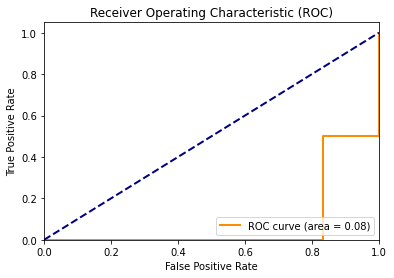

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={
'learning_rate': ["constant", "invscaling", "adaptive"],
'hidden_layer_sizes': [(100,1), (100,2), (100,3)],
'alpha': [0.0001,0.001],
'activation': ["logistic", "relu", "Tanh"]
}
mlp= MLPClassifier()
grid = GridSearchCV(estimator=mlp,param_grid=parameters,n_jobs=-1,verbose=2,cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages

/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages

/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages

/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages

/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages

/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 1), learning_rate=invscaling; total time=  48.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 2), learning_rate=constant; total time= 1.1min
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 3), learning_rate=invscaling; total time= 1.0min
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 1), learning_rate=invscaling; total time=  53.2s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 2), learning_rate=invscaling; total time= 1.2min
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 3), learning_rate=invscaling; total time= 1.1min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 2), learning_rate=adaptive; total time= 1.2min
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 2), learning_rate=constant; total time= 1.2min
[CV] END activation=Tanh, alpha=0.0001, hidden_layer_sizes=(100, 1), learn

/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sanjeev/.local/lib/python3.9/site-packages

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 2), 'learning_rate': 'adaptive'}
MLPClassifier(hidden_layer_sizes=(100, 2), learning_rate='adaptive')
0.6


/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=(100, 1))
# mlp_model = MLPClassifier(hidden_layer_sizes=(100, 2), learning_rate='adaptive')

# Fit the model
mlp_model.fit(X_train, y_train)

# Make predictions
y_pred = mlp_model.predict(X_test)

# Calculate metrics
mlp_accuracy = accuracy_score(y_test, y_pred)
mlp_kappa = cohen_kappa_score(y_test, y_pred)
mlp_auc = roc_auc_score(y_test, y_pred)
mlp_precision = precision_score(y_test, y_pred, average='weighted') # or 'macro', 'micro', 'samples', 'weighted'
mlp_recall = recall_score(y_test, y_pred, average='weighted') # or 'macro', 'micro', 'samples', 'weighted'
mlp_f1 = f1_score(y_test, y_pred, average='weighted') # or 'macro', 'micro', 'samples', 'weighted'

# Print the metrics
print("Accuracy:", mlp_accuracy)
print("Cohen's Kappa:", mlp_kappa)
print("AUC:", mlp_auc)
print("Precision:", mlp_precision)
print("Recall:", mlp_recall)
print("F1 Score:", mlp_f1)

Accuracy: 0.75
Cohen's Kappa: 0.0
AUC: 0.5
Precision: 0.5625
Recall: 0.75
F1 Score: 0.6428571428571428


/home/sanjeev/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pred_prob_mlp_positive = mlp_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_mlp_positive)
roc_auc_mlp= auc(fpr, tpr)

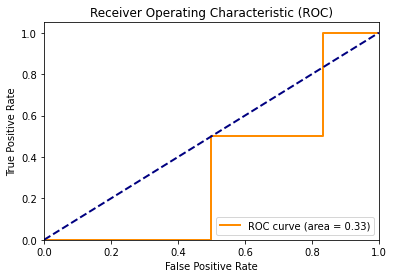

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 1), learning_rate=adaptive; total time= 1.1min
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 2), learning_rate=adaptive; total time= 1.0min
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 3), learning_rate=invscaling; total time=  50.0s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 1), learning_rate=invscaling; total time=  52.2s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 2), learning_rate=invscaling; total time= 1.0min
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 3), learning_rate=invscaling; total time= 1.1min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 2), learning_rate=invscaling; total time=   4.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 2), learning_rate=invscaling; total time=   4.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 2), le

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 1), learning_rate=constant; total time= 1.0min
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 2), learning_rate=invscaling; total time= 1.1min
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 3), learning_rate=invscaling; total time= 1.2min
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 1), learning_rate=adaptive; total time= 1.2min
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 3), learning_rate=constant; total time=  59.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 1), learning_rate=constant; total time=   3.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 1), learning_rate=constant; total time=   3.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 1), learning_rate=invscaling; total time=   3.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 1), learning_ra

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 1), learning_rate=invscaling; total time= 1.1min
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 2), learning_rate=invscaling; total time= 1.1min
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 3), learning_rate=adaptive; total time= 1.1min
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 1), learning_rate=adaptive; total time= 1.1min
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 2), learning_rate=adaptive; total time= 1.1min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 1), learning_rate=constant; total time=   4.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 1), learning_rate=invscaling; total time=  44.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 3), learning_rate=constant; total time=  49.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 1), learning_rat

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 1), learning_rate=adaptive; total time=  48.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 2), learning_rate=constant; total time=  49.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 3), learning_rate=constant; total time=  51.0s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 1), learning_rate=constant; total time= 1.2min
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 2), learning_rate=invscaling; total time=  32.9s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 2), learning_rate=invscaling; total time= 1.1min
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 3), learning_rate=adaptive; total time= 1.1min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 3), learning_rate=constant; total time=   4.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 3), learnin

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 1), learning_rate=constant; total time= 1.1min
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 2), learning_rate=invscaling; total time= 1.1min
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 3), learning_rate=adaptive; total time= 1.1min
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 1), learning_rate=adaptive; total time= 1.1min
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 2), learning_rate=adaptive; total time= 1.1min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 1), learning_rate=constant; total time=   4.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 1), learning_rate=adaptive; total time=  32.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 2), learning_rate=adaptive; total time=   3.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 2), learning_rate=a

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 1), learning_rate=constant; total time=  20.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 2), learning_rate=constant; total time=  49.7s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 3), learning_rate=constant; total time=  51.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 3), learning_rate=invscaling; total time= 1.1min
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 1), learning_rate=invscaling; total time= 1.1min
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 2), learning_rate=adaptive; total time=  28.2s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 3), learning_rate=invscaling; total time=  56.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 1), learning_rate=adaptive; total time=   4.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 1), lear

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import pandas as pd

results={
    'classifiers':['SVM','RANDOMFOREST','DECISION TREE','LOGISTIC REGRESSION','MLP'],
    "accuracy" : [svm_accuracy,rf_accuracy,dtc_accuracy,lr_accuracy,mlp_accuracy],
    'precision':[svm_precision,rf_precision,dtc_precision,lr_precision,mlp_precision],
    'AUC': [svm_auc,rf_auc,dtc_auc,lr_auc,mlp_auc],
    'kappa': [svm_kappa,rf_kappa,dtc_kappa,lr_kappa,mlp_recall],
    'recall': [svm_recall,rf_recall,dtc_recall,lr_recall,mlp_recall],
    'F1': [svm_f1,rf_f1,dtc_f1,lr_f1,mlp_f1]
}
metric_table=pd.DataFrame(results)
metric_table.set_index('classifiers', inplace=True)
metric_table

,accuracy,precision,AUC,kappa,recall,F1
classifiers,,,,,,
SVM,0.750,0.875000,0.833333,0.500000,0.750,0.766667
RANDOMFOREST,0.750,0.750000,0.666667,0.333333,0.750,0.750000
DECISION TREE,0.625,0.683333,0.583333,0.142857,0.625,0.645455
LOGISTIC REGRESSION,0.625,0.535714,0.416667,-0.200000,0.625,0.576923
MLP,0.750,0.562500,0.500000,0.750000,0.750,0.642857


In [ ]:
import pandas as pd

results={
    'classifiers':['SVM','RANDOMFOREST','DECISION TREE','LOGISTIC REGRESSION','MLP'],
    "accuracy" : [svm_accuracy,rf_accuracy,dtc_accuracy,lr_accuracy,mlp_accuracy],
    'precision':[svm_precision,rf_precision,dtc_precision,lr_precision,mlp_precision],
    'AUC': [svm_auc,rf_auc,dtc_auc,lr_auc,mlp_auc],
    'kappa': [svm_kappa,rf_kappa,dtc_kappa,lr_kappa,mlp_recall],
    'recall': [svm_recall,rf_recall,dtc_recall,lr_recall,mlp_recall],
    'F1': [svm_f1,rf_f1,dtc_f1,lr_f1,mlp_f1]
}
metric_table=pd.DataFrame(results)
metric_table.set_index('classifiers', inplace=True)
metric_table

,accuracy,precision,AUC,kappa,recall,F1
classifiers,,,,,,
SVM,0.750,0.875000,0.833333,0.500000,0.750,0.766667
RANDOMFOREST,0.625,0.535714,0.416667,-0.200000,0.625,0.576923
DECISION TREE,0.125,0.250000,0.083333,-0.555556,0.125,0.166667
LOGISTIC REGRESSION,0.375,0.450000,0.250000,-0.428571,0.375,0.409091
MLP,0.250,0.062500,0.500000,0.250000,0.250,0.100000
